# Bike Buyers Analysis and Purchase Prediction

In [2]:
# Importing applicable libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('bike_buyers.csv')

In [4]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,"$40,000.00",1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,"$30,000.00",3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,"$80,000.00",5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,"$70,000.00",0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,"$30,000.00",0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [5]:
data.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
1021,16466,S,F,"$20,000.00",0,Partial High School,Manual,No,2,0-1 Miles,Europe,32,Yes
1022,19273,M,F,"$20,000.00",2,Partial College,Manual,Yes,0,0-1 Miles,Europe,63,No
1023,22400,M,M,"$10,000.00",0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes
1024,20942,S,F,"$20,000.00",0,High School,Manual,No,1,5-10 Miles,Europe,31,No
1025,18484,S,M,"$80,000.00",2,High School,Skilled Manual,No,2,1-2 Miles,Pacific,50,Yes


In [6]:
data.shape

(1026, 13)

In [7]:
data.describe()

,ID,Children,Cars,Age
count,1026.000000,1026.000000,1026.000000,1026.000000
mean,19969.196881,1.892788,1.437622,44.138402
std,5332.672942,1.626670,1.125538,11.349282
min,11000.000000,0.000000,0.000000,25.000000
25%,15304.750000,0.000000,1.000000,35.000000
50%,19744.000000,2.000000,1.000000,43.000000
75%,24457.750000,3.000000,2.000000,52.000000
max,29447.000000,5.000000,4.000000,89.000000


In [8]:
# removing the dollar sign from the Income column

data.Income = data.Income.str.replace('$','')

In [9]:
# removing the commas and fullstop in the Income column

data.Income = data.Income.str.replace(',','')

In [10]:
data.dtypes

ID                   int64
Marital Status      object
Gender              object
Income              object
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [11]:
# converting the data in the Income column from str to float

data['Income'] = data.Income.astype('str').astype('float')

In [12]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [13]:
# converting the data in the Income column from float to int

data['Income'] = data.Income.astype('float').astype('Int64')

In [14]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [15]:
for a in data.columns:
    print(a)

ID
Marital Status
Gender
Income
Children
Education
Occupation
Home Owner
Cars
Commute Distance
Region
Age
Purchased Bike


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1026 non-null   int64 
 1   Marital Status    1026 non-null   object
 2   Gender            1026 non-null   object
 3   Income            1026 non-null   Int64 
 4   Children          1026 non-null   int64 
 5   Education         1026 non-null   object
 6   Occupation        1026 non-null   object
 7   Home Owner        1026 non-null   object
 8   Cars              1026 non-null   int64 
 9   Commute Distance  1026 non-null   object
 10  Region            1026 non-null   object
 11  Age               1026 non-null   int64 
 12  Purchased Bike    1026 non-null   object
dtypes: Int64(1), int64(4), object(8)
memory usage: 105.3+ KB


In [17]:
data.describe()

,ID,Income,Children,Cars,Age
count,1026.000000,1026.0,1026.000000,1026.000000,1026.000000
mean,19969.196881,56208.576998,1.892788,1.437622,44.138402
std,5332.672942,31293.284007,1.626670,1.125538,11.349282
min,11000.000000,10000.0,0.000000,0.000000,25.000000
25%,15304.750000,30000.0,0.000000,1.000000,35.000000
50%,19744.000000,60000.0,2.000000,1.000000,43.000000
75%,24457.750000,70000.0,3.000000,2.000000,52.000000
max,29447.000000,170000.0,5.000000,4.000000,89.000000


In [18]:
# review of Children data

childrenmode = data.Children.mode()
print('The mode for children is: {}'.format(childrenmode))

childrenaverage = data.Children.mean()
print('\n The average for children is: {}'.format(childrenaverage))

The mode for children is: 0    0
Name: Children, dtype: int64

 The average for children is: 1.8927875243664718


In [19]:
# review of age data

agemode = data.Age.mode()
print('The mode for age is: {}'.format(agemode))

ageaverage = data.Age.mean()
print('\n The average for age is: {}'.format(ageaverage))

The mode for age is: 0    40
Name: Age, dtype: int64

 The average for age is: 44.13840155945419


In [20]:
# review of cars data

carsmode = data.Cars.mode()
print('The mode for cars is: {}'.format(carsmode))

carsaverage = data.Cars.mean()
print('\n The average for cars is: {}'.format(carsaverage))

The mode for cars is: 0    2
Name: Cars, dtype: int64

 The average for cars is: 1.4376218323586745


In [21]:
# Do we have more home owners than non-owners

data.groupby(['Home Owner']).ID.count()

Home Owner
No     329
Yes    697
Name: ID, dtype: int64

In [22]:
# comparison between married and single

data.groupby(['Marital Status']).ID.count()

Marital Status
M    549
S    477
Name: ID, dtype: int64

In [23]:
# gender count

data.groupby(['Gender']).ID.count()

Gender
F    501
M    525
Name: ID, dtype: int64

<Axes: ylabel='Region'>

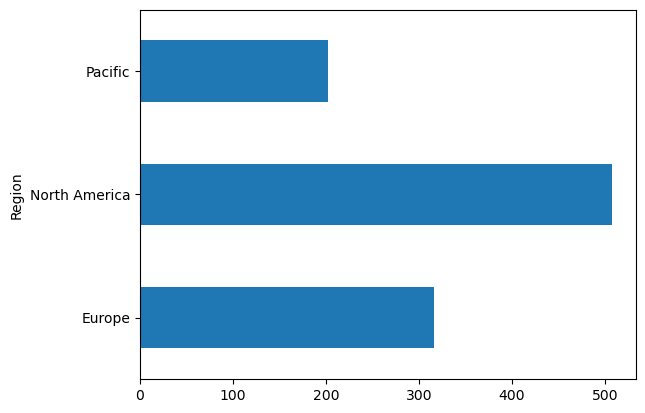

In [24]:
# comparison per region

data.groupby(['Region']).ID.count().plot.barh()

In [25]:
# average income per education background

data.groupby(['Education']).Income.mean()

Education
Bachelors              63054.662379
Graduate Degree        65942.857143
High School            47173.913043
Partial College        54604.316547
Partial High School    34102.564103
Name: Income, dtype: Float64

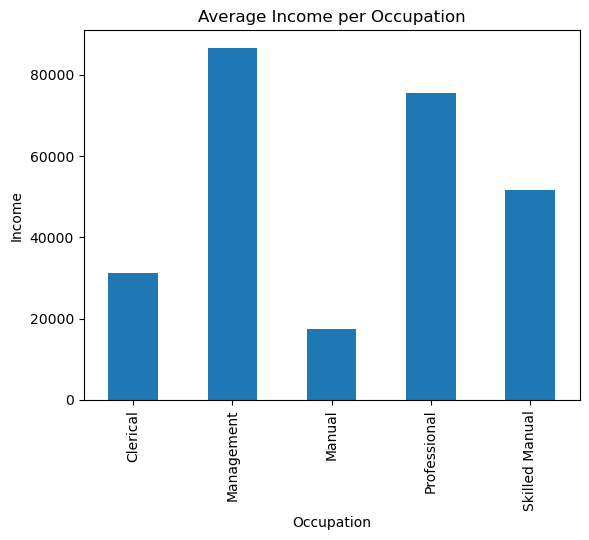

In [26]:
# average income per occupation

data.groupby(['Occupation']).Income.mean().plot.bar()
plt.title('Average Income per Occupation')
plt.ylabel('Income')
plt.xlabel('Occupation')
plt.show()

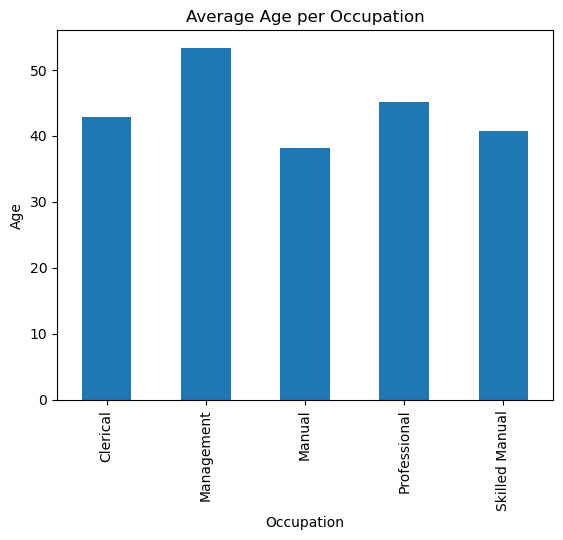

In [27]:
# average age per occupation

data.groupby(['Occupation']).Age.mean().plot.bar()
plt.title('Average Age per Occupation')
plt.ylabel('Age')
plt.xlabel('Occupation')
plt.show()

In [45]:
data.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [46]:
data['Home Owner'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
data[data['Income']==0].value_counts()

Series([], dtype: int64)

In [31]:
data.Occupation.nunique()

5

## Encoding Categorical Columns to Numerical Data

In [33]:
gender = pd.get_dummies(data['Gender'], drop_first=True, prefix='Gender', prefix_sep='_')
maritalstatus = pd.get_dummies(data['Marital Status'], drop_first=True, prefix='maritalstatus', prefix_sep='_')
region = pd.get_dummies(data['Region'], drop_first=True, prefix='Region', prefix_sep='_')

data = pd.concat([data,gender,maritalstatus,region], axis=1)

In [35]:
data['HomeOwner'] = data['Home Owner'].map({'Yes':1, 'No':0})
data['PurchasedBike'] = data['Purchased Bike'].map({'Yes':1, 'No':0})
data['CarOwner'] = data['Cars'].apply(lambda x:1 if x>= 1 else 0) # focus is not on number of cars
data['HasChildren'] = data['Children'].apply(lambda x:1 if x>=1 else 0) # has kids or not
data['LowDistance'] = data['Commute Distance'].apply(lambda x:1 if x=='0-1 Miles' or x=='2-5 Miles' else 0)
data['Occupation_Professional'] = data['Occupation'].apply(lambda x:1 if x=='Professional' else 0)
data['LessCar'] = data['Cars'].apply(lambda x:1 if x<=1 else 0) # has a car or not
data['HighDegree'] = data['Education'].apply(lambda x:1 if x in ('Graduate Degree', 'Bachelors') else 0)

In [37]:
# updated version of data
data.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Region_North America,Region_Pacific,HomeOwner,PurchasedBike,CarOwner,HasChildren,LowDistance,Occupation_Professional,LessCar,HighDegree
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,...,0,0,1,0,0,1,1,0,1,1
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,...,0,0,1,0,1,1,1,0,1,0
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,...,0,0,0,0,1,1,1,1,0,0
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,...,0,1,1,1,1,0,0,1,1,1
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,...,0,0,0,1,0,0,1,0,1,1
5,13507,M,F,10000,2,Partial College,Manual,Yes,0,1-2 Miles,...,0,0,1,0,0,1,0,0,1,0
6,27974,S,M,160000,2,High School,Management,Yes,4,0-1 Miles,...,0,1,1,1,1,1,1,0,0,0
7,19364,M,M,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,...,0,0,1,1,0,1,1,0,1,1
8,22155,M,M,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,...,0,1,1,0,1,1,0,0,0,0
9,19280,M,M,120000,2,Partial College,Manual,Yes,1,0-1 Miles,...,0,0,1,1,1,1,1,0,1,0


## Train Test Split Dataset

In [39]:
y = data.PurchasedBike
y.head()

0    0
1    0
2    0
3    1
4    1
Name: PurchasedBike, dtype: int64

In [46]:
X = data.drop(['PurchasedBike','Purchased Bike','ID','Marital Status','Gender','Children','Education','Occupation','Home Owner','Cars','Commute Distance','Region'], axis=1)
X.head()

,Income,Age,Gender_M,maritalstatus_S,Region_North America,Region_Pacific,HomeOwner,CarOwner,HasChildren,LowDistance,Occupation_Professional,LessCar,HighDegree
0,40000,42,0,0,0,0,1,0,1,1,0,1,1
1,30000,43,1,0,0,0,1,1,1,1,0,1,0
2,80000,60,1,0,0,0,0,1,1,1,1,0,0
3,70000,41,1,1,0,1,1,1,0,0,1,1,1
4,30000,36,1,1,0,0,0,0,0,1,0,1,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [48]:
y_test.value_counts()

0    168
1    140
Name: PurchasedBike, dtype: int64

In [49]:
print('\n X_train: \n',X_train.head(2))
print('\n X_test: \n',X_test.head(2))
print('\n y_train: \n',y_train.head(2))
print('\n y_test: \n',y_test.head(2))


 X_train: 
      Income  Age  Gender_M  maritalstatus_S  Region_North America  \
500   60000   47         1                0                     1   
983  130000   41         1                0                     1   

     Region_Pacific  HomeOwner  CarOwner  HasChildren  LowDistance  \
500               0          1         1            1            1   
983               0          1         1            1            1   

     Occupation_Professional  LessCar  HighDegree  
500                        1        1           1  
983                        0        0           1  

 X_test: 
      Income  Age  Gender_M  maritalstatus_S  Region_North America  \
963   90000   66         0                0                     1   
406   40000   41         0                0                     0   

     Region_Pacific  HomeOwner  CarOwner  HasChildren  LowDistance  \
963               0          1         1            1            0   
406               0          1         0            

## Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
LR_pred = LR_model.predict(X_test)
print('Accuracy Score: ',round(accuracy_score(LR_pred,y_test), 2))

print('\nAccuracy Score_2: ',round(accuracy_score(y_test,LR_pred), 2))

Accuracy Score:  0.55

Accuracy Score_2:  0.55


In [59]:
print(classification_report(LR_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71       308
           1       0.00      0.00      0.00         0

    accuracy                           0.55       308
   macro avg       0.50      0.27      0.35       308
weighted avg       1.00      0.55      0.71       308



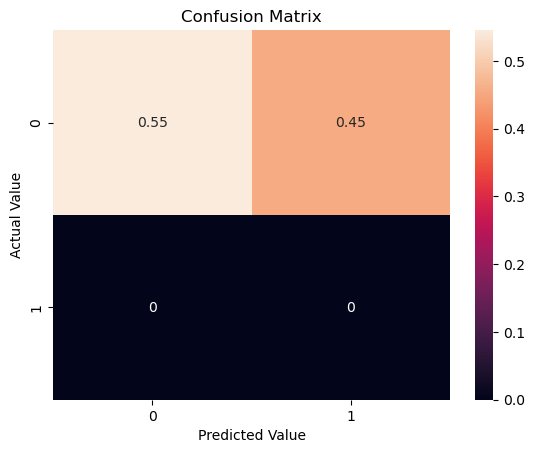

In [60]:
# Confusion Matrix

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(LR_pred, y_test, normalize='true'), annot=True, ax=ax)

ax.set_title('Confusion Matrix')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')

plt.show()